In [4]:
#load data

#import pandas library as pd
import pandas as pd
from pandas import read_csv

# Import necessary libraries

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")
import sqlite3 as sql
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeRegressor

dataframe = pd.read_csv("Life_Expectancy_Data.csv")

In [5]:
dataframe.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [6]:
#c.General Information about the dataframe
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [7]:
#d.provide statistical summary for the whole dataset
dataframe.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


In [8]:
dataframe

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


In [9]:
# Describe the Shape of the Data
print("Life Expectancy Details:")
print(dataframe.shape)

Life Expectancy Details:
(2938, 22)


In [10]:
print(dataframe.dtypes)

Country                             object
Year                                 int64
Status                              object
Life expectancy                    float64
Adult Mortality                    float64
infant deaths                        int64
Alcohol                            float64
percentage expenditure             float64
Hepatitis B                        float64
Measles                              int64
 BMI                               float64
under-five deaths                    int64
Polio                              float64
Total expenditure                  float64
Diphtheria                         float64
 HIV/AIDS                          float64
GDP                                float64
Population                         float64
 thinness  1-19 years              float64
 thinness 5-9 years                float64
Income composition of resources    float64
Schooling                          float64
dtype: object


In [11]:
print(dataframe.describe(include="all"))

            Country         Year      Status  Life expectancy   \
count          2938  2938.000000        2938       2928.000000   
unique          193          NaN           2               NaN   
top     Afghanistan          NaN  Developing               NaN   
freq             16          NaN        2426               NaN   
mean            NaN  2007.518720         NaN         69.224932   
std             NaN     4.613841         NaN          9.523867   
min             NaN  2000.000000         NaN         36.300000   
25%             NaN  2004.000000         NaN         63.100000   
50%             NaN  2008.000000         NaN         72.100000   
75%             NaN  2012.000000         NaN         75.700000   
max             NaN  2015.000000         NaN         89.000000   

        Adult Mortality  infant deaths      Alcohol  percentage expenditure  \
count       2928.000000    2938.000000  2744.000000             2938.000000   
unique              NaN            NaN          N

In [12]:
#Find the Misisng Values
print (dataframe.isnull().sum())

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64


In [13]:
print (dataframe['Adult Mortality'].isnull().sum())

10


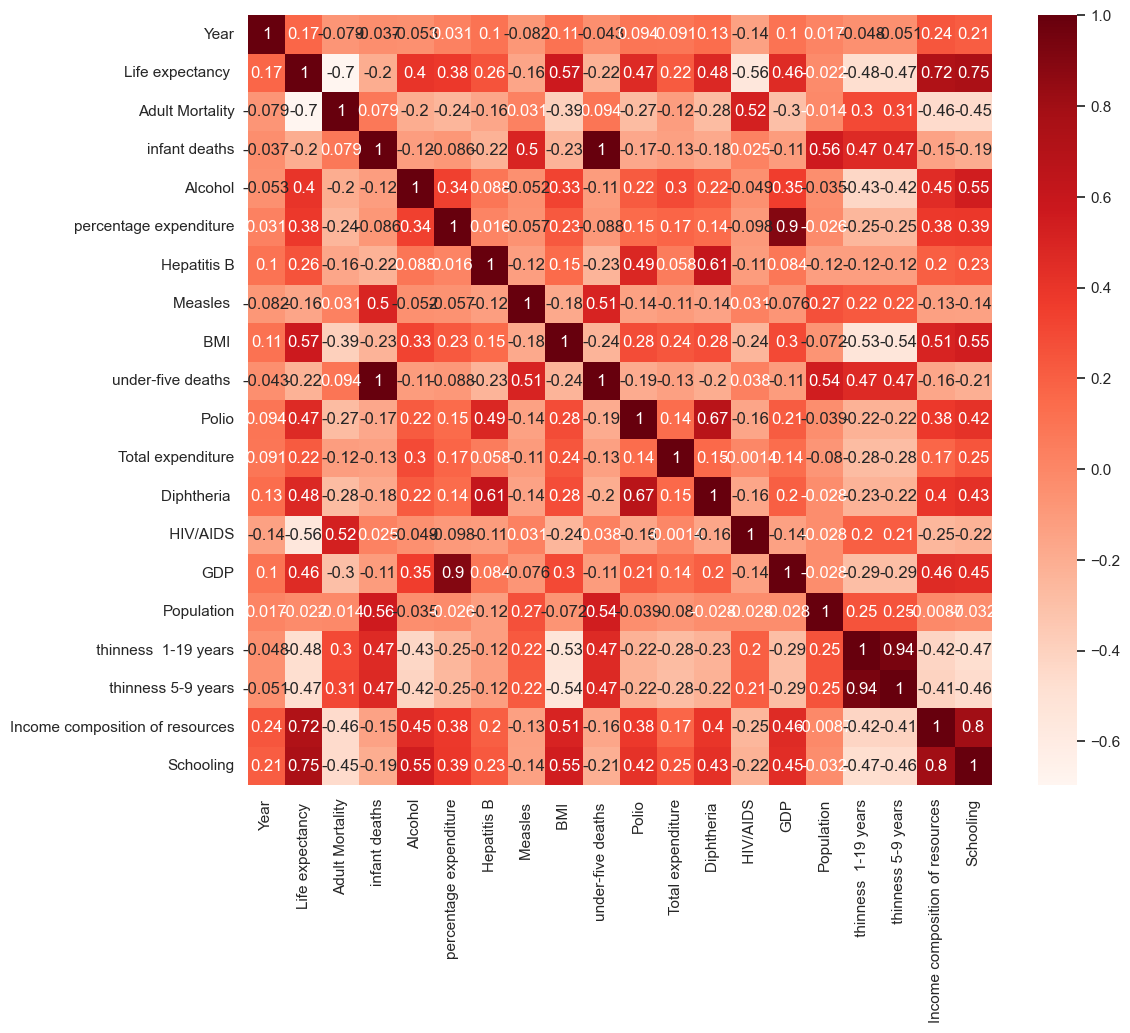

In [14]:
# Bivariate Statistics (using correlation)

#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = dataframe.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [15]:
# Data Cleaning
# Drop null values
dataframe = dataframe.dropna()

In [16]:
print (dataframe.isnull().sum())

Country                            0
Year                               0
Status                             0
Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
 BMI                               0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
 HIV/AIDS                          0
GDP                                0
Population                         0
 thinness  1-19 years              0
 thinness 5-9 years                0
Income composition of resources    0
Schooling                          0
dtype: int64


In [17]:
# Data Reduction
# Drop irrelevant features
dataframe = dataframe.drop(['Country', 'Year', 'Status'], axis=1)

In [18]:
dataframe

,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,44.3,723.0,27,4.36,0.000000,68.0,31,27.1,42,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,44.5,715.0,26,4.06,0.000000,7.0,998,26.7,41,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,44.8,73.0,25,4.43,0.000000,73.0,304,26.3,40,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,45.3,686.0,25,1.72,0.000000,76.0,529,25.9,39,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


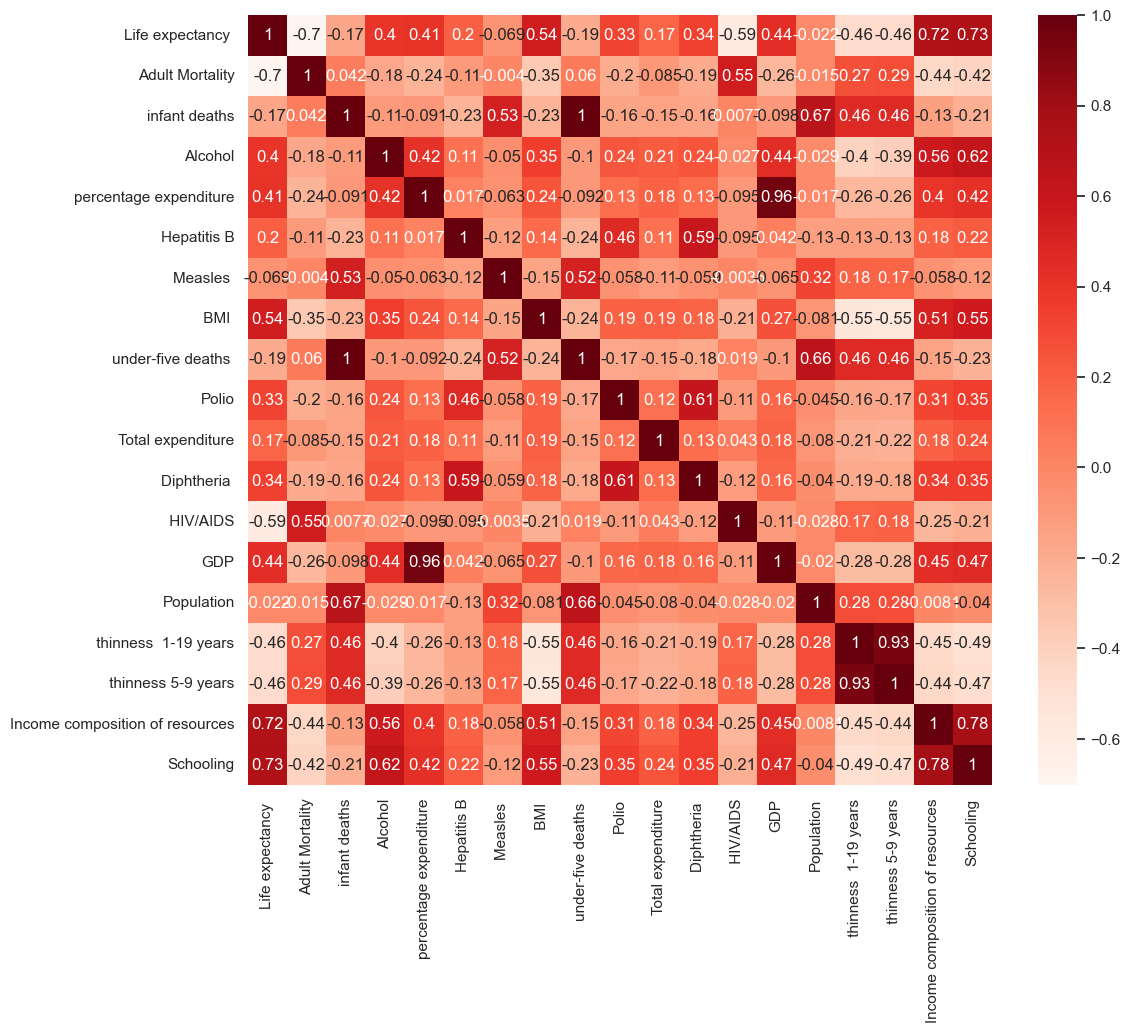

In [19]:
# Correlation
plt.figure(figsize=(12,10))
corr_matrix = dataframe.corr()
sns.heatmap(corr_matrix, annot=True,cmap=plt.cm.Reds)
plt.show()

In [20]:
corr_matrix = dataframe.corr()
high_corr = corr_matrix[abs(corr_matrix) > 0.5].stack().reset_index()
high_corr = high_corr[high_corr['level_0'] != high_corr['level_1']]
high_corr = high_corr.drop_duplicates(subset=[0])
print(high_corr)

                            level_0                          level_1         0
1                  Life expectancy                   Adult Mortality -0.702523
2                  Life expectancy                              BMI   0.542042
3                  Life expectancy                          HIV/AIDS -0.592236
4                  Life expectancy   Income composition of resources  0.721083
5                  Life expectancy                         Schooling  0.727630
8                   Adult Mortality                         HIV/AIDS  0.550691
10                    infant deaths                         Measles   0.532680
11                    infant deaths               under-five deaths   0.996906
12                    infant deaths                       Population  0.671758
14                          Alcohol  Income composition of resources  0.561074
15                          Alcohol                        Schooling  0.616975
17           percentage expenditure                 

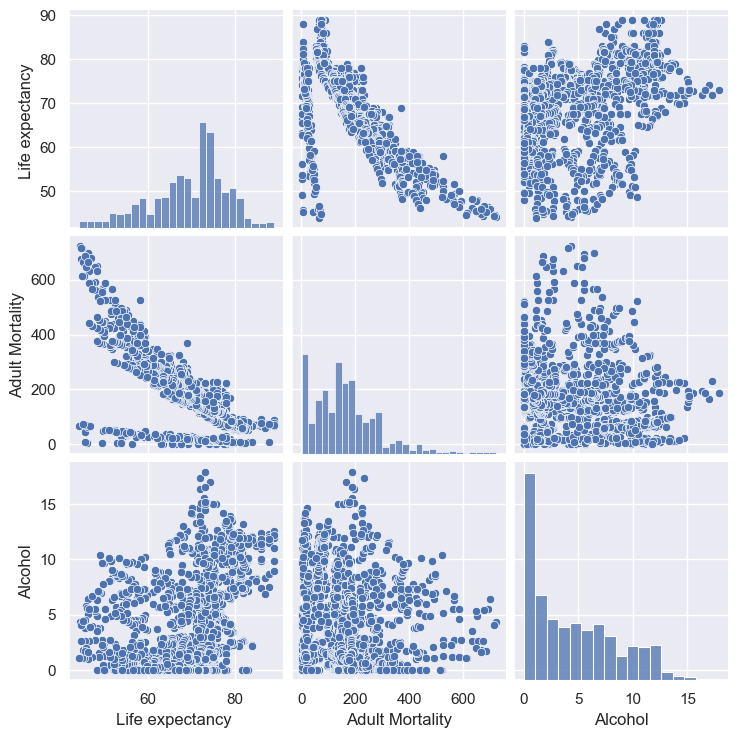

In [21]:
# Exploratory Data Analysis
%matplotlib inline
# Distribution of features
sns.pairplot(dataframe, vars=['Life expectancy ', 'Adult Mortality', 'Alcohol'])
plt.show()

In [22]:
print(dataframe.columns)

Index(['Life expectancy ', 'Adult Mortality', 'infant deaths', 'Alcohol',
       'percentage expenditure', 'Hepatitis B', 'Measles ', ' BMI ',
       'under-five deaths ', 'Polio', 'Total expenditure', 'Diphtheria ',
       ' HIV/AIDS', 'GDP', 'Population', ' thinness  1-19 years',
       ' thinness 5-9 years', 'Income composition of resources', 'Schooling'],
      dtype='object')


In [23]:
# Feature Selection
# Select features with high correlation to Life Expectancy
selected_features = ['Adult Mortality', 'infant deaths', 'Alcohol', 'Hepatitis B', ' BMI ', 'Polio', 'Diphtheria ', 'GDP', ' HIV/AIDS', 'Population', 'Income composition of resources', 'Schooling']
X = dataframe[selected_features]
y = dataframe['Life expectancy ']

In [24]:
print(X.shape)
print(y.shape)

(1649, 12)
(1649,)


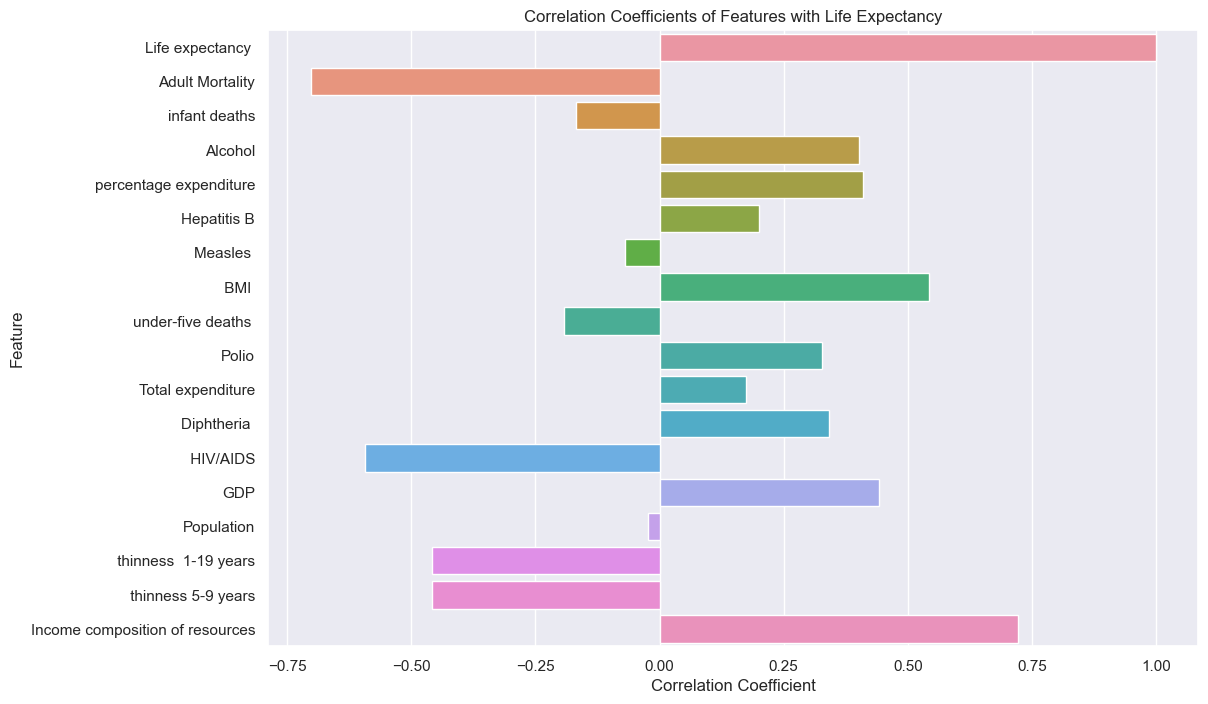

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

# create correlation matrix
corr_matrix = dataframe.corr()

# plot bar chart of correlation coefficients
plt.figure(figsize=(12,8))
sns.barplot(x=corr_matrix['Life expectancy '].values[:-1], y=corr_matrix.index[:-1], orient='h')
plt.title('Correlation Coefficients of Features with Life Expectancy')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Feature')
plt.show()

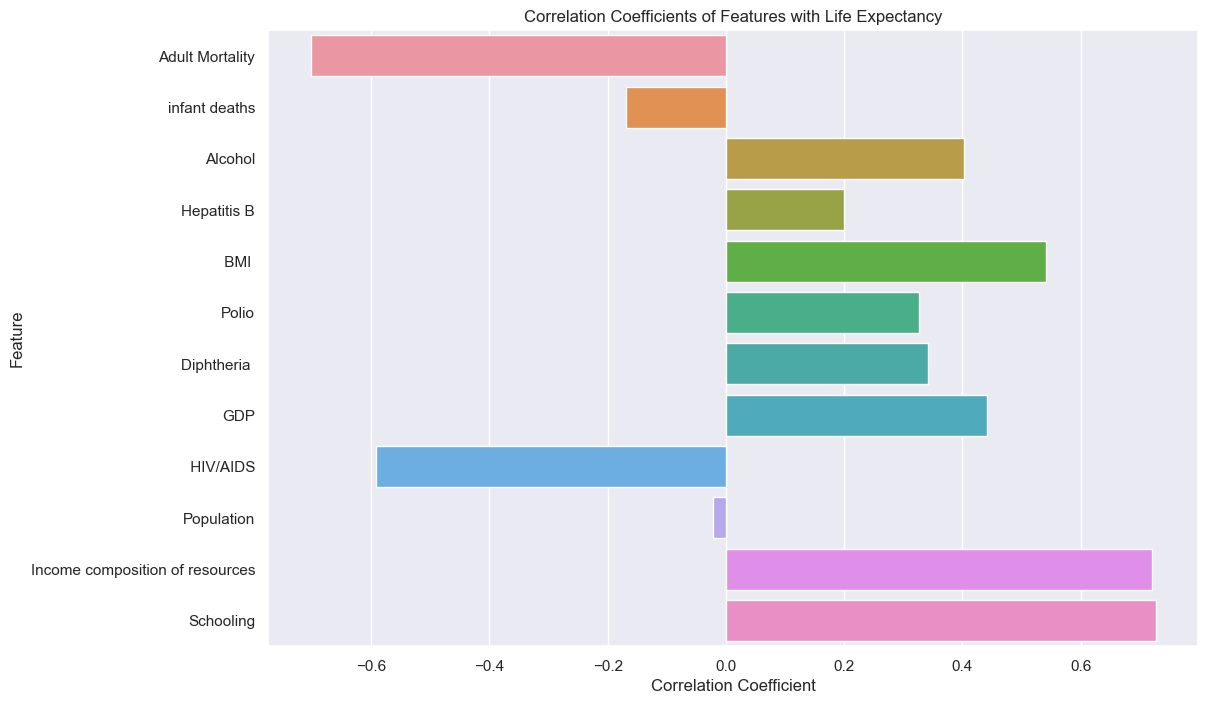

In [26]:
# create correlation matrix
corr_matrix = dataframe.corr()

# Select features with high correlation to Life Expectancy
selected_features = selected_features = ['Adult Mortality', 'infant deaths', 'Alcohol', 'Hepatitis B', ' BMI ', 'Polio', 'Diphtheria ', 'GDP', ' HIV/AIDS', 'Population', 'Income composition of resources', 'Schooling']

# plot bar chart of correlation coefficients
plt.figure(figsize=(12,8))
sns.barplot(x=corr_matrix['Life expectancy '][selected_features].values, y=selected_features, orient='h')
plt.title('Correlation Coefficients of Features with Life Expectancy')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Feature')
plt.show()

In [69]:
# Define the predictor variables
X = dataframe[['Adult Mortality', 'infant deaths', 'Alcohol', 'Hepatitis B', ' BMI ', 'Polio', 'Diphtheria ', 'GDP', ' HIV/AIDS', 'Population', 'Income composition of resources', 'Schooling']]

# Define the target variable
y = dataframe['Life expectancy ']

In [70]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [71]:
# Multiple Regression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [72]:
import statsmodels.api as sm
X_train = sm.add_constant(X_train) # add a constant to the predictor variable
model = sm.OLS(y_train, X_train).fit() # fit the model

X_test = sm.add_constant(X_test) # add a constant to the predictor variable
y_pred = model.predict(X_test) # make predictions on the testing data

print(model.summary())


                            OLS Regression Results                            
Dep. Variable:       Life expectancy    R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                     451.6
Date:                Tue, 18 Apr 2023   Prob (F-statistic):               0.00
Time:                        23:36:07   Log-Likelihood:                -3130.7
No. Observations:                1154   AIC:                             6287.
Df Residuals:                    1141   BIC:                             6353.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

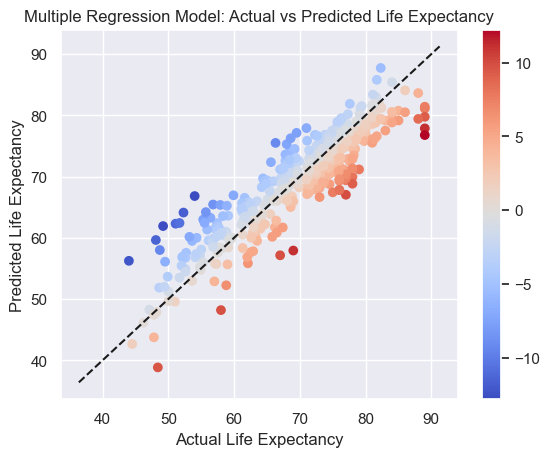

In [73]:
# Visualize the results
fig, ax = plt.subplots()
scatter = ax.scatter(y_test, y_pred, c=(y_test - y_pred), cmap='coolwarm')
plt.colorbar(scatter)
lims = [np.min([ax.get_xlim(), ax.get_ylim()]), np.max([ax.get_xlim(), ax.get_ylim()])]
ax.plot(lims, lims, 'k--')
plt.xlabel("Actual Life Expectancy")
plt.ylabel("Predicted Life Expectancy")
plt.title("Multiple Regression Model: Actual vs Predicted Life Expectancy")
plt.show()

In [64]:
# Predict on training set
y_train_pred = model.predict(X_train)
# Calculate metrics for training set
mae_train = mean_absolute_error(y_train, y_train_pred)
mse_train = mean_squared_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)
print('Training Set Metrics:')
print('Mean Absolute Error (MAE): %.2f' % mae_train)
print('Mean Squared Error (MSE): %.2f' % mse_train)
print('Coefficient of Determination (R^2): %.2f' % r2_train)

Training Set Metrics:
Mean Absolute Error (MAE): 6.18
Mean Squared Error (MSE): 63.19
Coefficient of Determination (R^2): 0.17


In [35]:
# Step 2: Model Tuning
# Create a parameter grid to search over
param_grid = {'normalize': [True, False]}
# Perform a grid search using cross-validation
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='neg_mean_absolute_error', cv=5)
grid_search.fit(X_train, y_train)
# Get the best hyperparameters
best_params = grid_search.best_params_
print('Best Hyperparameters:', best_params)
# Train the model with the best hyperparameters
model_tuned = LinearRegression(normalize=best_params['normalize'])
model_tuned.fit(X_train, y_train)

Best Hyperparameters: {'normalize': True}


C:\Users\Jia Yi Chan\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(
C:\Users\Jia Yi Chan\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipel

LinearRegression(normalize=True)

In [36]:
# Model Evaluation
y_pred_test = model.predict(X_test)
mae_test = mean_absolute_error(y_test, y_pred_test)
mse_test = mean_squared_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)
print("Testing Set:")
print(f"Mean Absolute Error (MAE): {mae_test:.2f}")
print(f"Mean Squared Error (MSE): {mse_test:.2f}")
print(f"Coefficient of Determination (R^2): {r2_test:.2f}\n")

Testing Set:
Mean Absolute Error (MAE): 2.88
Mean Squared Error (MSE): 14.38
Coefficient of Determination (R^2): 0.82



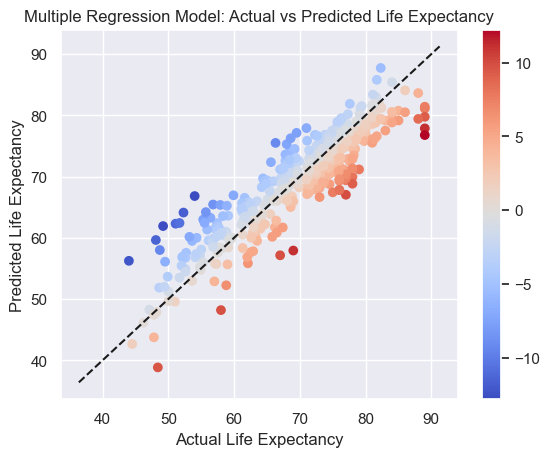

In [65]:
# Visualize the results
fig, ax = plt.subplots()
scatter = ax.scatter(y_test, y_pred, c=(y_test - y_pred), cmap='coolwarm')
plt.colorbar(scatter)
lims = [np.min([ax.get_xlim(), ax.get_ylim()]), np.max([ax.get_xlim(), ax.get_ylim()])]
ax.plot(lims, lims, 'k--')
plt.xlabel("Actual Life Expectancy")
plt.ylabel("Predicted Life Expectancy")
plt.title("Multiple Regression Model: Actual vs Predicted Life Expectancy")
plt.show()

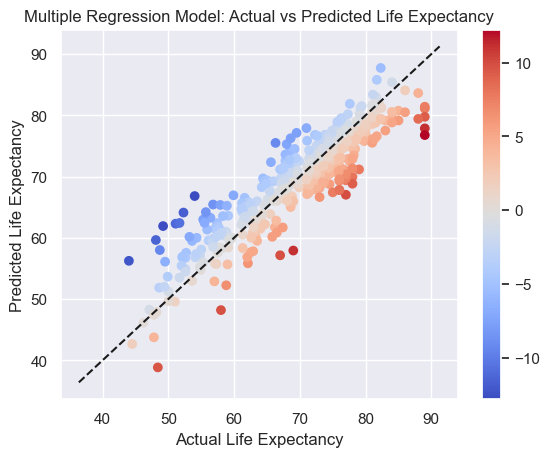

In [43]:
y_pred = model.predict(X_test)

fig, ax = plt.subplots()
scatter = ax.scatter(y_test, y_pred, c=(y_test - y_pred), cmap='coolwarm')

# add colorbar to show the range of colors
plt.colorbar(scatter)

# add diagonal line for comparison
lims = [np.min([ax.get_xlim(), ax.get_ylim()]), np.max([ax.get_xlim(), ax.get_ylim()])]
ax.plot(lims, lims, 'k--')

plt.xlabel("Actual Life Expectancy")
plt.ylabel("Predicted Life Expectancy")
plt.title("Multiple Regression Model: Actual vs Predicted Life Expectancy")
plt.show()

In [ ]:
# Interpretation
coefs = pd.DataFrame({'Feature': X.columns, 'Coefficient': best_model.coef_})
coefs = coefs.append({'Feature': 'Intercept', 'Coefficient': best_model.intercept_}, ignore_index=True)
coefs = coefs.sort_values(by='Coefficient', ascending=False)
print("Feature Importance:")
print(coefs)


In [32]:
# Create the decision tree model
tree_model = DecisionTreeRegressor(random_state=42)

# Fit the model on the training set
tree_model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = tree_model.predict(X_test)

# Evaluate the model performance using MAE, MSE, and R-squared
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error (MAE)\t{:.2f}".format(mae))
print("Mean Squared Error (MSE)\t{:.2f}".format(mse))
print("Coefficient of Determination (R^2)\t{:.2f}".format(r2))

Mean Absolute Error (MAE)	1.67
Mean Squared Error (MSE)	7.47
Coefficient of Determination (R^2)	0.91


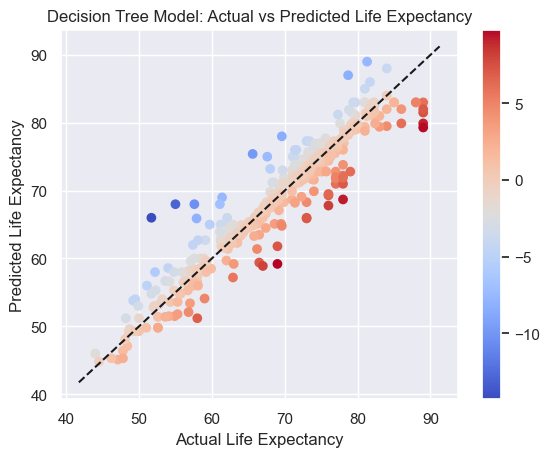

In [33]:
#Create visualizations to evaluate the performance of the multiple regression model.

import matplotlib.pyplot as plt

y_pred = tree_model.predict(X_test)
fig, ax = plt.subplots()
scatter = ax.scatter(y_test, y_pred, c=(y_test - y_pred), cmap='coolwarm')

# add colorbar to show the range of colors
plt.colorbar(scatter)

# add diagonal line for comparison
lims = [np.min([ax.get_xlim(), ax.get_ylim()]), np.max([ax.get_xlim(), ax.get_ylim()])]
ax.plot(lims, lims, 'k--')

plt.xlabel("Actual Life Expectancy")
plt.ylabel("Predicted Life Expectancy")
plt.title("Decision Tree Model: Actual vs Predicted Life Expectancy")
plt.show()
